
> **Binance Spot and Futures Testnet**

After developing your functions, you can utilize the [Binance Spot Testnet](https://testnet.binance.vision/) and [Futures Testnet](https://testnet.binancefuture.com/) to test your use cases for free.

> **How to Test Functions on the Spot Testnet?**

Log in to the Binance Spot Test Network website by clicking [Log In with GitHub](https://testnet.binance.vision/).

> If you don’t have any API Keys, click `[Generate HMAC_SHA256 Key] `

and follow the instructions to create one. Please keep your Secret Key secure as it will not be shown again. Do not share this key with anyone.

> If you forget your Secret Key, you will need to click `[Revoke]`

to delete the API and create a new one.

In [ ]:
!pip install python-binance

In [ ]:
from binance.client import Client

# Initialize the Binance API
api_key = ''
api_secret = ''

client = Client(api_key, api_secret, testnet=True)

# Fetch historical kline (candlestick) data
bars = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "2 hours ago UTC")

# Print the fetched data
for bar in bars:
    print(bar)

`pd.to_datetime(df['Open time'], unit='ms')`: Converts the timestamp from milliseconds to a readable datetime format.

`df.set_index('Open time', inplace=True)`: Sets the 'Open time' column as the index.

`df.iloc[:, :5]`: Selects only the first five columns: Open, High, Low, Close, and Volume.

In [ ]:
import pandas as pd

# Load result into a DataFrame
df = pd.DataFrame(bars)

# Set the column names
df.columns = [
    "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
    "Quote asset volume", "Number of trades", "Taker buy base asset volume",
    "Taker buy quote asset volume", "Ignore"
]

# Convert the timestamp into datetime objects
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

# Set the Open time as the index of our DataFrame
df.set_index('Open time', inplace=True)

# Keep only the first 5 columns (Volume included)
df = df.iloc[:, :5]

print(df.head())


                                Open             High              Low  \
Open time                                                                
2025-05-18 22:15:00  104095.26000000  104100.02000000  104066.44000000   
2025-05-18 22:16:00  104066.46000000  104077.78000000  104061.24000000   
2025-05-18 22:17:00  104061.24000000  104072.14000000  104056.01000000   
2025-05-18 22:18:00  104072.14000000  104130.90000000  104070.00000000   
2025-05-18 22:19:00  104130.90000000  104177.58000000  104103.26000000   

                               Close      Volume  
Open time                                         
2025-05-18 22:15:00  104066.46000000  1.55568000  
2025-05-18 22:16:00  104061.24000000  2.11579000  
2025-05-18 22:17:00  104072.13000000  1.15056000  
2025-05-18 22:18:00  104130.90000000  3.81242000  
2025-05-18 22:19:00  104103.26000000  1.82887000  


Explanation:

`order_market_buy`: Places a market order to buy the specified quantity of BTC with USDT.

`get_open_orders`: Retrieves a list of the user's open orders for the specified symbol.

In [ ]:
# Buy a little bit of bitcoin
order = client.order_market_buy(
    symbol='BTCUSDT',
    quantity=.001)
print(order)

{'symbol': 'BTCUSDT', 'orderId': 3670686, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ33128ddbc94b1786c76689', 'transactTime': 1747613657494, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'origQuoteOrderQty': '0.00000000', 'cummulativeQuoteQty': '106.57561000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'workingTime': 1747613657494, 'fills': [{'price': '106575.61000000', 'qty': '0.00100000', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 1741791}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}


In [ ]:
# Get a list of orders that are pending
open_orders = client.get_open_orders(symbol='BTCUSDT')
open_orders

[]

In [ ]:
# Fetch a list of open orders for BTCUSDT
open_orders = client.get_open_orders(symbol='BTCUSDT')

if open_orders:
    print("Open Orders: ", open_orders)
else:
    print("No open orders.")


No open orders.


In [ ]:
#Get a list of orders that we made previously
all_orders = client.get_all_orders(symbol='BTCUSDT')
print(all_orders)

[{'symbol': 'BTCUSDT', 'orderId': 3668529, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJb71d384ba355141dd6a787', 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '106.42085000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'stopPrice': '0.00000000', 'icebergQty': '0.00000000', 'time': 1747613038845, 'updateTime': 1747613038845, 'isWorking': True, 'workingTime': 1747613038845, 'origQuoteOrderQty': '0.00000000', 'selfTradePreventionMode': 'EXPIRE_MAKER'}, {'symbol': 'BTCUSDT', 'orderId': 3668558, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ5ea16a80e358d621d1fc2', 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '106.42085000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'stopPrice': '0.00000000', 'icebergQty': '0.00000000', 'time': 1747613055296, 'updateTime': 1747613055296, 'isWorking': True, 'workingTime': 1747613055296,

In [ ]:
import json

#Get account info
acct = client.get_account()

# Show the results in a formatted way
print(json.dumps(acct, indent=4, sort_keys=True))

{
    "accountType": "SPOT",
    "balances": [
        {
            "asset": "ETH",
            "free": "1.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "BTC",
            "free": "1.00300000",
            "locked": "0.00000000"
        },
        {
            "asset": "LTC",
            "free": "5.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "BNB",
            "free": "1.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "USDT",
            "free": "9680.58269000",
            "locked": "0.00000000"
        },
        {
            "asset": "TRX",
            "free": "2022.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "XRP",
            "free": "233.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "NEO",
            "free": "89.00000000",
            "locked": "0.00000000"
        },

`order_market_buy`: Places a market order to buy the specified quantity of BTC with USDT.

`get_open_orders`: Retrieves a list of open orders for the specified symbol.

`get_all_orders`: Fetches a list of all previous orders for BTCUSDT.

`get_account`: Retrieves the account information, formatted using the json library for better readability.

In [ ]:
client = Client(api_key, api_secret, testnet=True)

# Place a market buy order to purchase 0.001 BTC
order = client.order_market_buy(
    symbol='BTCUSDT',
    quantity=0.001)
print("Order: ", order)

# Get a list of pending orders for BTCUSDT
open_orders = client.get_open_orders(symbol='BTCUSDT')
print("Open Orders: ", open_orders)

# Get a list of all previous orders for BTCUSDT
all_orders = client.get_all_orders(symbol='BTCUSDT')
print("All Orders: ", all_orders)

# Get account info
acct = client.get_account()

# Show the results in a formatted way
print("Account Info: ", json.dumps(acct, indent=4, sort_keys=True))

The `MACD (Moving Average Convergence Divergence)` is a popular momentum indicator that helps identify trend reversals and can be very useful for your trading bot. Below is your code with some explanations:

Explanation:

`pd.to_numeric(df['Close'], errors='coerce')`: Converts the 'Close' column to numeric, setting non-convertible entries to NaN.

`df.dropna(inplace=True)`: Removes rows with NaN values to ensure consistency.

Function Usage: MACD calculation and plotting remain unchanged.

In [ ]:
! pip uninstall pandas_ta
! pip install pandas_ta

In [ ]:
!pip uninstall numpy
!pip install numpy==1.26.4

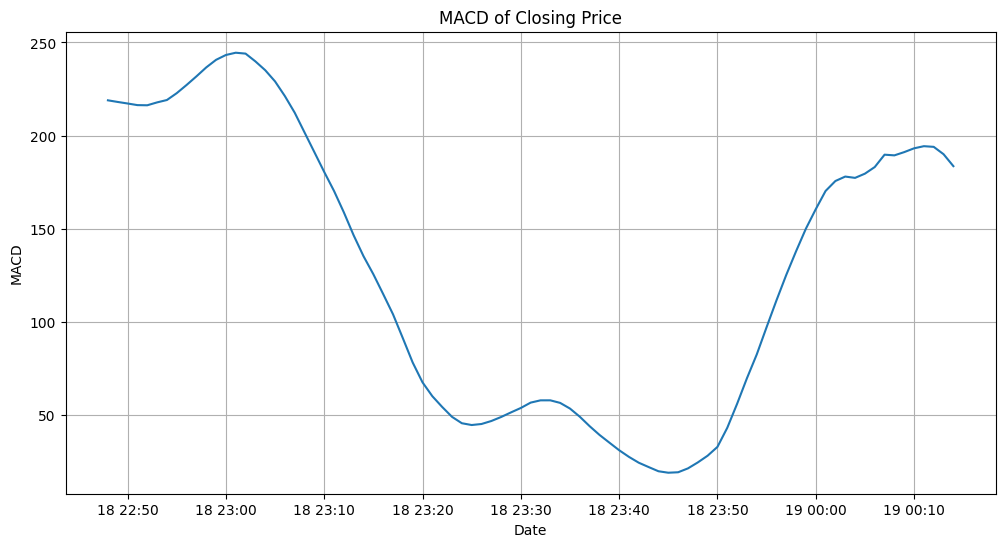

In [ ]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Convert data to numeric, forcing errors to NaN (then drop them)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop any rows with NaN values to prevent type issues
df.dropna(inplace=True)

# Function to calculate MACD
def get_macd(data, slow=26, fast=12, signal=9):
    macd = ta.macd(data, slow=slow, fast=fast, signal=signal)
    return macd.iloc[:,-1]

# Calculate MACD for the closing prices
macd = get_macd(df["Close"])

# Plot MACD
plt.figure(figsize=(12,6))
plt.plot(df.index, macd)
plt.title('MACD of Closing Price')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.grid(True)
plt.show()


`Wrapper Function`: This function wraps the previous script, fetching and processing 1-minute historical data.

`DataFrame Columns`: Consolidates the columns for readability.

`Numeric Conversion`: Ensures all data remains numeric to avoid type issues.

`Indicators`: Adds MACD and a 30-minute percentage change to the DataFrame.

In [ ]:
# Get up-to-date 1-minute data from Binance and add the MACD and price changes
def get_bars(asset='ETH'):
    # Fetch historical 1-minute klines for the given asset
    bars = client.get_historical_klines(
        f"{asset}USDT", Client.KLINE_INTERVAL_1MINUTE, start_str="1 hour ago UTC")

    # Load the result into a DataFrame
    df = pd.DataFrame(bars)
    df.columns = [
        "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
        "Quote asset volume", "Number of trades", "Taker buy base asset volume",
        "Taker buy quote asset volume", "Ignore"]

    # Convert the timestamp into datetime objects
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

    # Set the Open time as the index of the DataFrame
    df.set_index('Open time', inplace=True)

    # Retain relevant columns
    df = df.iloc[:, :5]

    # Convert column data to numeric type
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Add trading indicators
    df['MACD'] = get_macd(df["Close"])
    df['Pct Change 30m'] = df['Close'].pct_change(30)

    return df

# Fetch and display data for BTC
btc_data = get_bars('BTC')
print(btc_data.head())


                          Open       High        Low      Close   Volume  \
Open time                                                                  
2025-05-18 23:16:00  105613.94  105728.01  105556.84  105593.68  1.16080   
2025-05-18 23:17:00  105593.45  105600.76  105591.33  105600.76  0.87219   
2025-05-18 23:18:00  105600.76  105637.38  105460.00  105464.30  3.85055   
2025-05-18 23:19:00  105464.30  105501.33  105464.30  105499.75  2.05652   
2025-05-18 23:20:00  105501.33  105629.07  105501.33  105625.06  2.60175   

                     MACD  Pct Change 30m  
Open time                                  
2025-05-18 23:16:00   NaN             NaN  
2025-05-18 23:17:00   NaN             NaN  
2025-05-18 23:18:00   NaN             NaN  
2025-05-18 23:19:00   NaN             NaN  
2025-05-18 23:20:00   NaN             NaN  


`Logical Conditions`: should_buy and should_sell are based on the last values of MACD and percentage change.

`Status Update`: The is_long variable is updated based on the buy/sell conditions.

`Time Sleep`: Introduce a 10-second pause before checking again.

**Buying condition:**

`MACD`: The MACD value of the latest bar (bars['MACD'][-1]) must be greater than 0. This indicates that the MACD line is above the signal line, suggesting positive momentum.

`Percentage Change 30m`: The 30-minute percentage change (bars['Pct Change 30m'][-1]) must also be **greater** than 0. This indicates that the asset's price has been increasing over the past 30 minutes.


**Selling condition:**

`MACD`: The MACD value of the latest bar (bars['MACD'][-1]) must be less than 0. This indicates that the MACD line is below the signal line, suggesting negative momentum.

`Percentage Change 30m`: The 30-minute percentage change (bars['Pct Change 30m'][-1]) must also be **less** than 0.

In [ ]:
import time

ASSET = 'BTC'
is_long = True

# Record the start time
start_time = time.time()
duration = 2 * 60 # 2 minutes in seconds
# default settings would be 30 minutes

while True:
    # Get historical data
    bars = get_bars(asset=ASSET)

    # Check if we should buy or sell
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0
    print(f"Is Long: {is_long} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not is_long and should_buy:
        # We should buy the asset
        print(f'Symbol: {ASSET} / Side: BUY')

        # Update status of our holding
        is_long = True

    elif is_long and should_sell:
        # We should sell the asset
        print(f'Symbol: {ASSET} / Side: SELL')

        # Update status of our holding
        is_long = False

    # Check if the duration has passed
    elapsed_time = time.time() - start_time
    if elapsed_time > duration:
        print(f"Stopping trade after {duration / 60} minutes.")
        break # Exit the while loop

    # Pause before iterating again
    time.sleep(10)
    print("*" * 20)


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************
Is Long: True / Should Buy: True / Should Sell: False
Stopping trade after 2.0 minutes.


<ipython-input-18-57a669cd8a3e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-18-57a669cd8a3e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


`Explanation`:

`Assets List`: Contains multiple assets with initial states and order sizes.

`execute_trade Functio`n: Handles the logic for deciding whether to buy or sell based on MACD and percentage change.

`Main Loop`: Iterates through each asset, executing the trade logic for each one and pausing between iterations.

In [ ]:
import time

# List of assets to trade with their order sizes
assets = [
    {'asset': 'BTC', 'is_long': False, 'order_size': 0.0025},
    {'asset': 'LTC', 'is_long': False, 'order_size': 100},
    {'asset': 'TRX', 'is_long': False, 'order_size': 1000},
    {'asset': 'ETH', 'is_long': False, 'order_size': 0.03},
    {'asset': 'BNB', 'is_long': False, 'order_size': 0.25},
    {'asset': 'XRP', 'is_long': False, 'order_size': 100},
]

# Function to perform buy or sell based on MACD and percentage change
def execute_trade(asset_info):
    bars = get_bars(asset=asset_info['asset'])

    # Check if we should buy or sell
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0

    print(f"{asset_info['asset']} - Is Long: {asset_info['is_long']} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not asset_info['is_long'] and should_buy:
        # Buy the asset
        print(f"Symbol: {asset_info['asset']} / Side: BUY - Indicators suggest a bullish trend (MACD > 0 and 30m % Change > 0)")

        # Update status of our holding
        asset_info['is_long'] = True

    elif asset_info['is_long'] and should_sell:
        # Sell the asset
        print(f"Symbol: {asset_info['asset']} / Side: SELL - Indicators suggest a bearish trend (MACD < 0 and 30m % Change < 0)")

        # Update status of our holding
        asset_info['is_long'] = False

while True:
    for asset in assets:
        execute_trade(asset)

    # Pause for 10 seconds before iterating again
    time.sleep(10)
    print("*" * 20)


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: False / Should Buy: True / Should Sell: False
Symbol: BTC / Side: BUY - Indicators suggest a bullish trend (MACD > 0 and 30m % Change > 0)


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: False / Should Sell: False
********************


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: False / Should Sell: False
********************


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: False / Should Sell: False
********************


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: False / Should Sell: False
********************


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-19-7d389308acd4>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-19-7d389308acd4>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: False / Should Sell: False


KeyboardInterrupt: 

- `Setup`: You configured the trading environment using Google Colab and connected to Binance using the ccxt and python-binance libraries. This involved fetching historical data and managing API keys securely.

- `Data Handling`: You retrieved and processed historical data for various assets, converting it into a pandas DataFrame, and ensured data types were consistent. This included converting timestamps to datetime objects and setting the 'Open time' as the index.

- `Technical Indicators`: You calculated key technical indicators such as MACD (Moving Average Convergence Divergence) and percentage price changes to inform your trading strategy.

- `Buy/Sell Logic`: Developed logic to determine buy and sell signals based on MACD and percentage price change conditions. These signals help identify bullish and bearish trends for trading decisions.

- `Multi-Asset Capability`: Extended the trading bot to handle multiple assets using a list of dictionaries to track each asset's status and order size.

- `Prototype Testing`: Built a prototype to simulate the trading logic in a loop, printing out desired behavior for buying and selling without placing real orders, ensuring functionality and debugging.

In [ ]:
# List of assets to trade with their initial status and order sizes
assets = [
    {'asset': 'BTC', 'is_long': False, 'order_size': 0.0025},
    {'asset': 'LTC', 'is_long': False, 'order_size': 100},
    {'asset': 'TRX', 'is_long': False, 'order_size': 1000},
    {'asset': 'ETH', 'is_long': False, 'order_size': 0.03},
    {'asset': 'BNB', 'is_long': False, 'order_size': 0.25},
    {'asset': 'XRP', 'is_long': False, 'order_size': 100},
]

# Function to fetch historical 1-minute klines and calculate indicators
def get_bars(asset='ETH'):
    # Fetch historical data for the asset against USDT
    bars = client.get_historical_klines(
        f"{asset}USDT", Client.KLINE_INTERVAL_1MINUTE, start_str="1 hour ago UTC")

    # Load data into DataFrame and set column names
    df = pd.DataFrame(bars)
    df.columns = [
        "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
        "Quote asset volume", "Number of trades", "Taker buy base asset volume",
        "Taker buy quote asset volume", "Ignore"]

    # Convert timestamps to datetime and set index
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df.set_index('Open time', inplace=True)
    df = df.iloc[:, :5]  # Keep relevant columns only

    # Convert all columns to numeric to avoid type issues
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Add MACD and percentage change indicators
    df['MACD'] = get_macd(df["Close"])
    df['Pct Change 30m'] = df['Close'].pct_change(30)

    return df

# Function to calculate MACD using pandas_ta
def get_macd(data, slow=26, fast=12, signal=9):
    macd = ta.macd(data, slow=slow, fast=fast, signal=signal)
    return macd.iloc[:, -1]

# Function to execute trade logic for a given asset
def execute_trade(asset_info, index):
    symbol = f"{asset_info['asset']}USDT"
    bars = get_bars(asset=asset_info['asset'])

    # Determine buy/sell conditions based on MACD and percentage change
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0

    # Print status for debugging
    print(f"Asset: {asset_info['asset']} / Is Long: {asset_info['is_long']} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not asset_info['is_long'] and should_buy:
        # Buy the asset if conditions are met
        print(f"We are buying {asset_info['order_size']} {asset_info['asset']}")
        order = client.order_market_buy(symbol=symbol, quantity=asset_info['order_size'])
        assets[index]['is_long'] = True

    elif asset_info['is_long'] and should_sell:
        # Sell the asset if conditions are met
        print(f"We are selling {asset_info['order_size']} {asset_info['asset']}")
        order = client.order_market_sell(symbol=symbol, quantity=asset_info['order_size'])
        assets[index]['is_long'] = False

# Main loop to iterate through each asset and execute trading logic
while True:
    for index, asset_info in enumerate(assets):
        execute_trade(asset_info, index)

    print('Iteration ended')
    print(assets)
    print("*" * 20)
    time.sleep(10)  # Pause for 10 seconds before the next iteration


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-20-592de29752fe>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-20-592de29752fe>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: False / Should Sell: True
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': False, 'order_size': 100}]
********************


KeyboardInterrupt: 

Bars DataFrame after get_bars:
                          Open       High        Low      Close   Volume  \
Open time                                                                  
2025-05-18 23:32:00  105868.74  105881.27  105762.71  105762.72  2.04540   
2025-05-18 23:33:00  105762.72  105764.37  105750.00  105764.37  1.65480   
2025-05-18 23:34:00  105764.01  105764.01  105725.08  105733.18  1.55874   
2025-05-18 23:35:00  105725.08  105733.18  105651.54  105686.98  1.42607   
2025-05-18 23:36:00  105688.01  105688.01  105665.39  105665.39  1.62982   

                     MACD  Pct Change 30m  
Open time                                  
2025-05-18 23:32:00   NaN             NaN  
2025-05-18 23:33:00   NaN             NaN  
2025-05-18 23:34:00   NaN             NaN  
2025-05-18 23:35:00   NaN             NaN  
2025-05-18 23:36:00   NaN             NaN  

Bars DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2025-05-18 23:32:00 to 2025-05-19 00:31:0

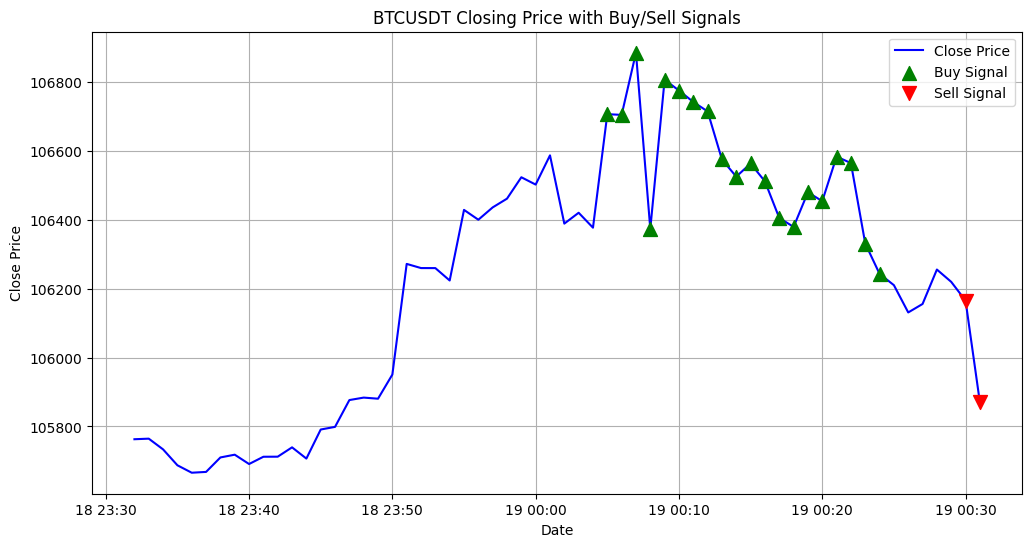

In [ ]:
# Fetch data for BTC and calculate indicators to prepare for plotting
# We use get_bars here to get the DataFrame with MACD and Pct Change
bars = get_bars(asset='BTC')

if not bars.empty:
    # Calculate buy and sell conditions for all rows
    # These will be boolean Series
    should_buy_series = (bars['MACD'] > 0) & (bars['Pct Change 30m'] > 0)
    should_sell_series = (bars['MACD'] < 0) & (bars['Pct Change 30m'] < 0)

    # Add buy/sell signals to the plot
    # Use the boolean series to directly index the DataFrame
    # Filter the bars DataFrame where the buy/sell conditions are True
    buy_signals = bars.loc[should_buy_series]
    sell_signals = bars.loc[should_sell_series]

    # Plot the closing price
    plt.figure(figsize=(12, 6))
    plt.plot(bars.index, bars['Close'], label='Close Price', color='blue')

    # Plot buy and sell signals on the closing price chart
    if not buy_signals.empty:
        plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', s=100, label='Buy Signal', zorder=5)
    else:
        print("No buy signals to plot.")

    if not sell_signals.empty:
        plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', s=100, label='Sell Signal', zorder=5)
    else:
        print("No sell signals to plot.")

    print("Bars DataFrame after get_bars:")
    print(bars.head()) # Print the head of the DataFrame
    print("\nBars DataFrame info:")
    bars.info() # Print DataFrame info including index type
    print("\nBars DataFrame index:")
    print(bars.index) # Print the index
    plt.title('BTCUSDT Closing Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Could not fetch or process data to plot signals.")